# THE SPARKS FOUNDATION INTERNSHIP

#### Task 1: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Author: Gautham Saravanamuthu

In [13]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
iris=pd.read_csv("C:\\Users\\GAUTHAM\\Desktop\\Iris.csv")
print('Dataset imported successfully')

Dataset imported successfully


In [16]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
iris.shape

(150, 6)

In [18]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

## 2-D Scatter Plot

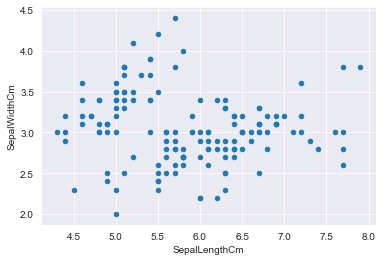

In [19]:
iris.plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm') ;
plt.show()

## Pair Plot 

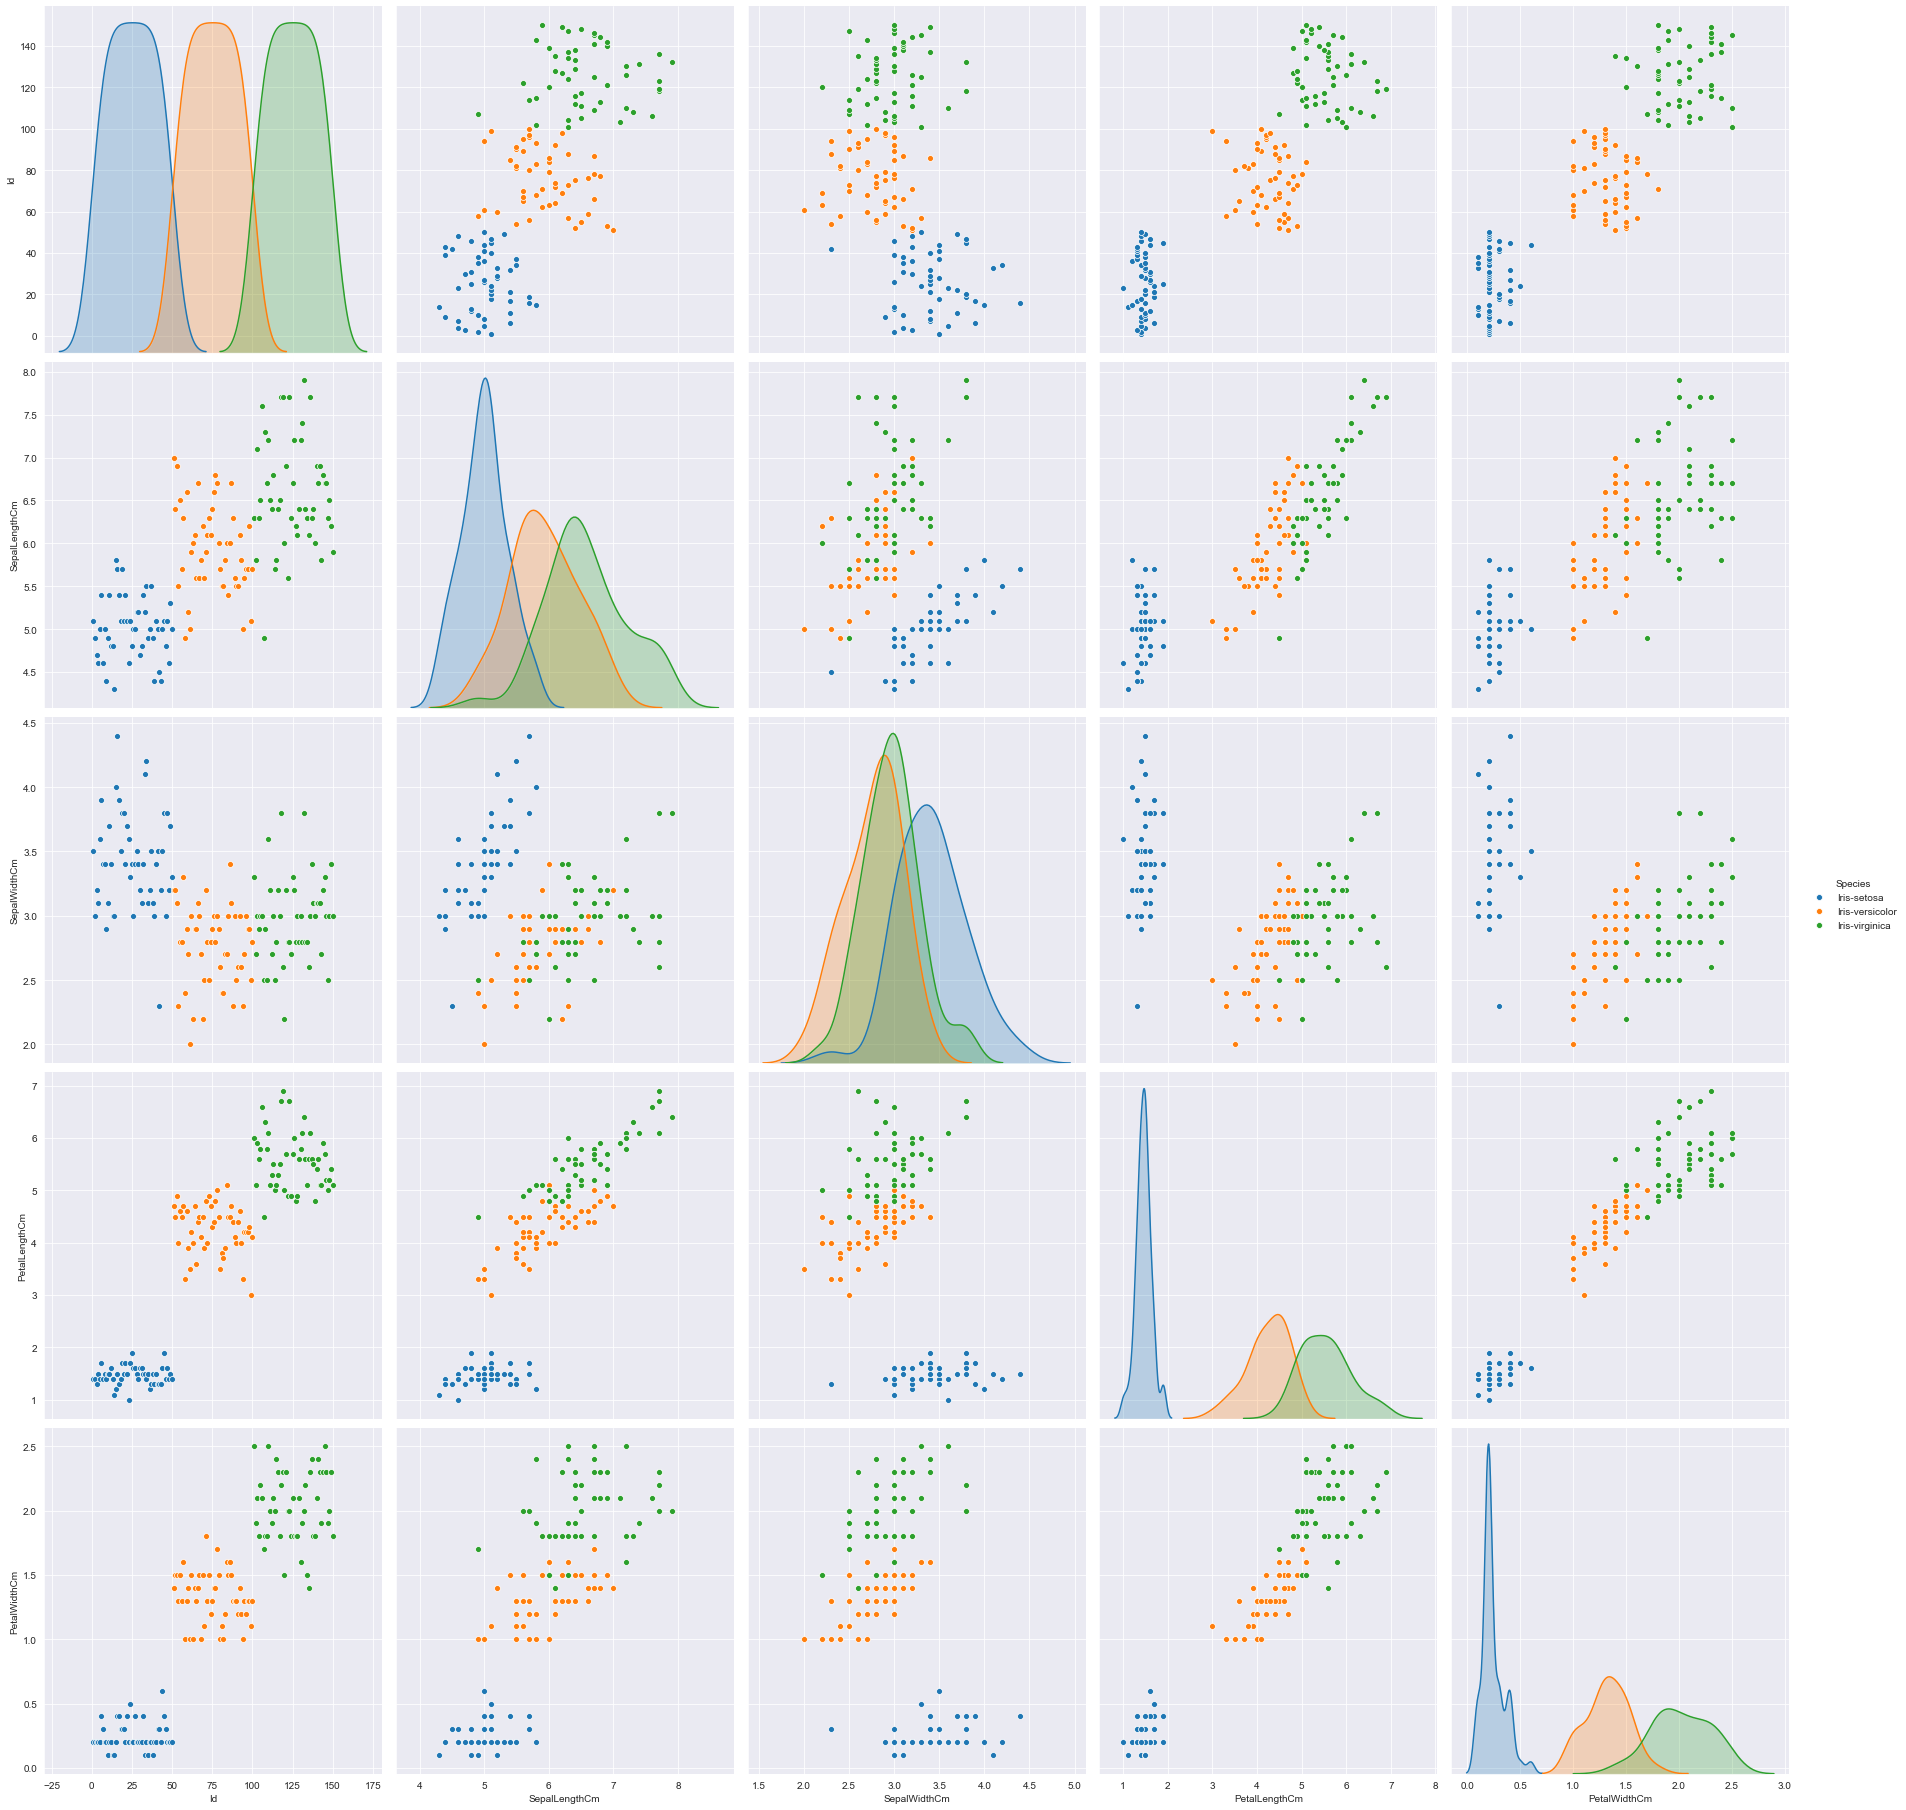

In [20]:
plt.close();
sns.set_style("darkgrid");
sns.pairplot(iris, hue = "Species", height = 5);
plt.show()

## Histogram

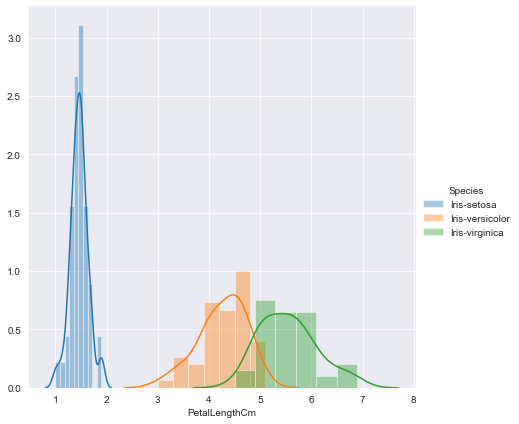

In [21]:
sns.FacetGrid(iris, hue = "Species", height = 6) \
.map(sns.distplot, "PetalLengthCm") \
.add_legend();
plt.show();

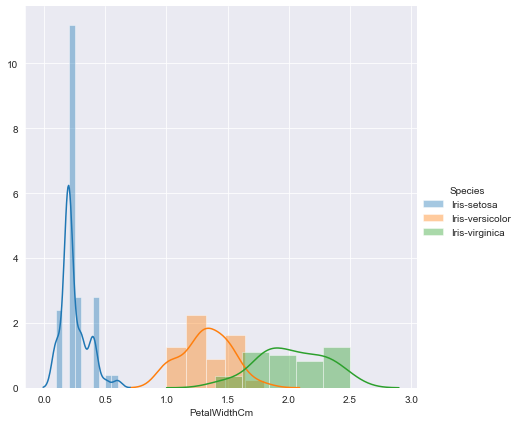

In [22]:
sns.FacetGrid(iris, hue = "Species", height = 6) \
.map(sns.distplot, "PetalWidthCm") \
.add_legend();
plt.show();

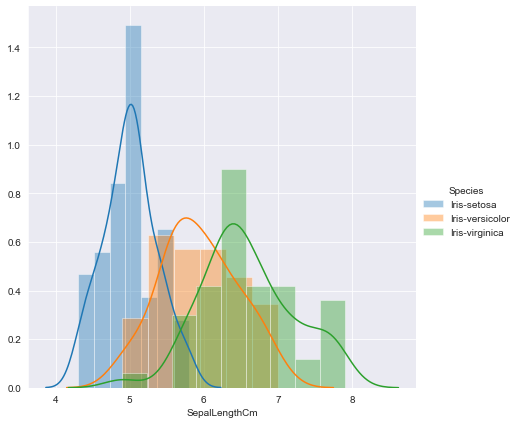

In [23]:
sns.FacetGrid(iris, hue="Species", height=6) \
   .map(sns.distplot, "SepalLengthCm") \
   .add_legend();
plt.show();

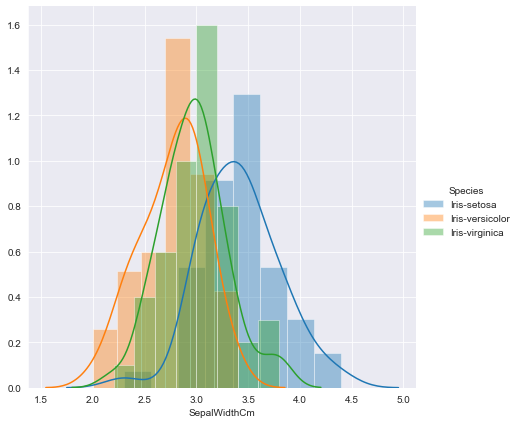

In [24]:
sns.FacetGrid(iris, hue="Species", height=6) \
   .map(sns.distplot, "SepalWidthCm") \
   .add_legend();
plt.show();

## Applying K-Means Clustering on Iris Dataset

In [25]:
#Importing library to apply K-Means
from sklearn.cluster import KMeans

In [26]:
#Finding the number of clusters
x = iris.iloc[:, [1,2,3,4]].values
Error= []

for i in range(1, 11):
    KMEANS = KMeans(n_clusters = i,n_jobs=4 , init = 'k-means++', max_iter = 300, n_init = 10, random_state = 21)
    KMEANS.fit(x)
    Error.append(KMEANS.inertia_)

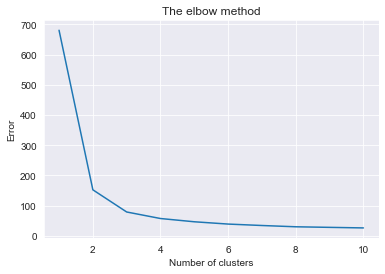

In [27]:
#Plotting the result
plt.plot(range(1, 11), Error)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Error') 
plt.show()

In [28]:
#Representing K-Means
KMEANS = KMeans(n_clusters = 3,n_jobs=4 , init = 'k-means++', max_iter = 300, n_init = 10, random_state = 21)
A_KMEANS= KMEANS.fit_predict(x)

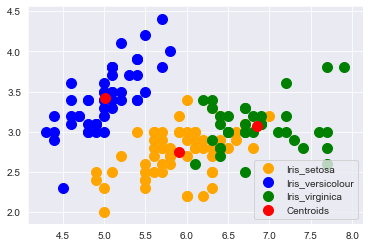

In [30]:
#Cluster Visualization using K-Means
plt.scatter(x[A_KMEANS == 0, 0], x[A_KMEANS == 0, 1], s = 100, c = 'orange', label = 'Iris_setosa')
plt.scatter(x[A_KMEANS == 1, 0], x[A_KMEANS == 1, 1], s = 100, c = 'blue', label = 'Iris_versicolour')
plt.scatter(x[A_KMEANS == 2, 0], x[A_KMEANS == 2, 1], s = 100, c = 'green', label = 'Iris_virginica')

plt.scatter(KMEANS.cluster_centers_[:, 0], KMEANS.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()
plt.show()